##NAIVE BAYES - WINE DATASET

Docente: José Alfredo
Discente: Douglas Wilian Lima Silva

In [1]:
#BIBLIOTECAS IMPORTANTES
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
#Carregamento da base de dados e criação do dataframe
wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#Separação das classes de treinamento e testes conforme realizado nos estudos anteriores
indices = np.random.permutation(data.shape[0])
div = int(0.4*len(indices)) #40% para treinamento e 60% para testes
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

xd = cj_desen.drop('target', axis =1)
yd = cj_desen.target

xt = cj_test.drop('target', axis=1)
yt = cj_test.target


display(xd.head())
display(yd.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


166    2
23     0
98     1
40     0
176    2
Name: target, dtype: int64

In [4]:
nb = GaussianNB()

nb.fit(xd, yd) #Treinamento do modelo

pred = nb.predict(xt) #Resultados previstos

acuracia = accuracy_score(yt, pred)*100
cm = confusion_matrix(yt, pred)


In [5]:
print(f'A acurácia do teste foi {acuracia:.4f}%')

A acurácia do teste foi 98.1308%


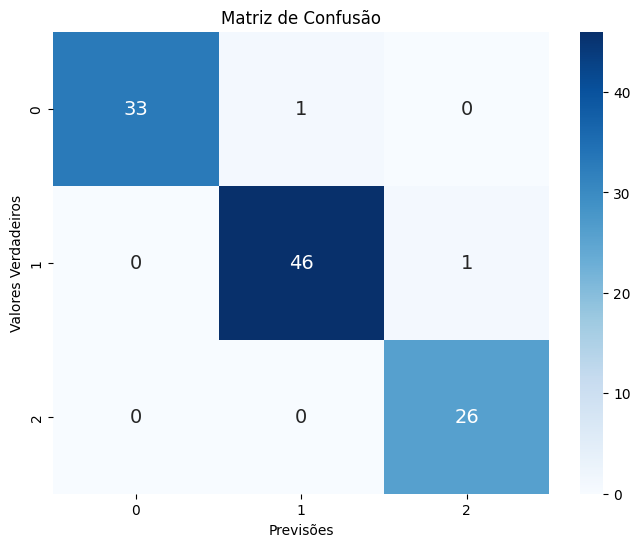

In [6]:
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [7]:
# Variação das porcentagens

p1 = [10, 20, 30, 40, 50]
vis=[]
columns = ['Média']
linhas = ['10%', '20%', '30%', '40%', '50%']
for pc in p1:
  media1 = 0
  for n in range(10):
    indices = np.random.permutation(data.shape[0])
    div = int((pc/100)*len(indices)) #40% para treinamento e 60% para testes
    desen_id , test_id = indices[:div], indices[div:]

    cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

    xd = cj_desen.drop('target', axis =1)
    yd = cj_desen.target

    xt = cj_test.drop('target', axis=1)
    yt = cj_test.target

    nb = GaussianNB()
    nb.fit(xd, yd)
    y_pred = nb.predict(xt)
    media1 = media1 + accuracy_score(yt, y_pred)

  vis.append(media1 / 10)

vd = pd.DataFrame(data = vis, columns=columns, index = linhas)

vd

,Média
10%,0.875155
20%,0.949650
30%,0.961600
40%,0.966355
50%,0.968539


##IMPLEMENTAÇÃO DO CÓDIGO COMPLETO

In [8]:
#Carregamento da base de dados e criação do dataframe
wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']
y = data['target'].to_numpy()

#Separação das classes de treinamento e testes conforme realizado nos estudos anteriores
indices = np.random.permutation(data.shape[0])
div = int(0.4*len(indices)) #40% para treinamento e 60% para testes
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

xd = cj_desen.drop('target', axis =1).to_numpy()
yd = cj_desen.target.to_numpy()

xt = cj_test.drop('target', axis=1).to_numpy()
yt = cj_test.target.to_numpy()

#Regra de Bayes
classes = len(np.unique(y))
probabilidadeC = np.zeros(classes)

for i in range(classes):
    indiceC = np.where(yd == i)
    probabilidadeC[i] = len(indiceC[0]) / len(yd)

#Matriz para armazenar as probabilidades de classe
matrizProbabilidade = np.zeros((xt.shape[0], classes))

#Calcular as probabilidades de classe
for i in range(classes):
    indiceC = np.where(yd == i)
    dadosDeTreino = xd[indiceC]
    media = np.mean(dadosDeTreino, axis=0)
    covariancia = np.cov(dadosDeTreino, rowvar=False)

    for j in range(xt.shape[0]):
        observation = xt[j]
        matrizProbabilidade[j, i] = multivariate_normal.pdf(observation, mean=media, cov=covariancia, allow_singular=True) * probabilidadeC[i]

#Prever as classes com base nas probabilidades:
y_pred = np.argmax(matrizProbabilidade, axis=1)

#Calcular a acurácia das previsões:
accuracy = accuracy_score(yt, y_pred)
print(f'Acurácia: {accuracy:.4f}')


Acurácia: 0.8131


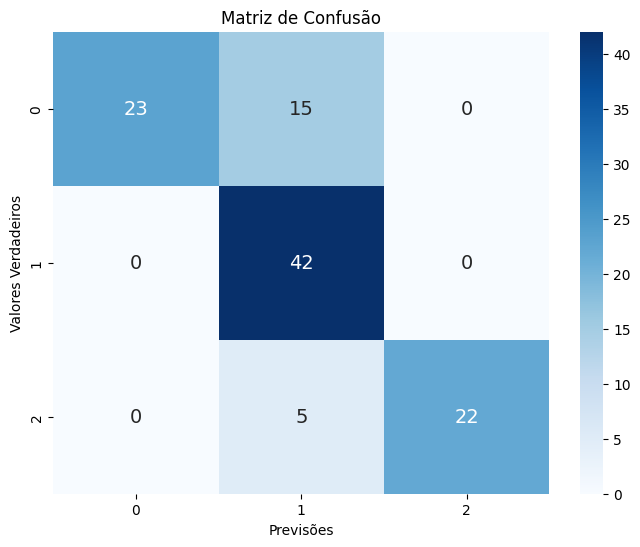

In [9]:
cm1 = confusion_matrix(yt, y_pred)
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [10]:
# Variação das porcentagens

p1 = [10, 20, 30, 40, 50]
vis=[]
columns = ['Média']
linhas = ['10%', '20%', '30%', '40%', '50%']
for pc in p1:
  media1 = 0
  for n in range(10):
    indices = np.random.permutation(data.shape[0])
    div = int((pc/100)*len(indices)) #40% para treinamento e 60% para testes
    desen_id , test_id = indices[:div], indices[div:]

    cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

    xd = cj_desen.drop('target', axis =1).to_numpy()
    yd = cj_desen.target.to_numpy()

    xt = cj_test.drop('target', axis=1).to_numpy()
    yt = cj_test.target.to_numpy()

    classes = len(np.unique(y))
    probabilidadeC = np.zeros(classes)

    for i in range(classes):
      indiceC = np.where(yd == i)
      probabilidadeC[i] = len(indiceC[0]) / len(yd)

    #Matriz para armazenar as probabilidades de classe
    matrizProbabilidade = np.zeros((xt.shape[0], classes))

    #Calcular as probabilidades de classe
    for i in range(classes):
      indiceC = np.where(yd == i)
      dadosDeTreino = xd[indiceC]
      media = np.mean(dadosDeTreino, axis=0)
      covariancia = np.cov(dadosDeTreino, rowvar=False)

      for j in range(xt.shape[0]):
        observation = xt[j]
        matrizProbabilidade[j, i] = multivariate_normal.pdf(observation, mean=media, cov=covariancia, allow_singular=True) * probabilidadeC[i]

    #Prever as classes com base nas probabilidades:
    y_pred = np.argmax(matrizProbabilidade, axis=1)
    media1 = media1 + accuracy_score(yt, y_pred)

  vis.append(media1 / 10)

vd = pd.DataFrame(data = vis, columns=columns, index = linhas)

vd

,Média
10%,0.334783
20%,0.362238
30%,0.677600
40%,0.869159
50%,0.948315


#BASE DE DADOS HEART DISEASE

###NAIVE BAYES

In [11]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

#Importação da base de dados
from google.colab import drive
drive.mount('/content/drive')


caminho_arquivo = "/content/drive/My Drive/HD/heart.csv"

heart = pd.read_csv(caminho_arquivo)
heart.head()
heart.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
indices2 = np.random.permutation(heart.shape[0])
div2 = int(0.4*len(indices2))
desen_id2 , test_id2 = indices2[:div2], indices2[div2:]

cj_desen2, cj_test2 = heart.loc[desen_id2,:], heart.loc[test_id2,:]

xd2 = cj_desen2.drop('target', axis =1)
yd2 = cj_desen2.target
xt2 = cj_test2.drop('target', axis=1)
yt2 = cj_test2.target


In [13]:
nb3 = GaussianNB()

nb3.fit(xd2, yd2) #Treinamento do modelo

pred3 = nb3.predict(xt2) #Resultados previstos

acuracia3 = accuracy_score(yt2, pred3)*100
cm3 = confusion_matrix(yt2, pred3)

In [14]:
print(f'A acurácia do teste foi {acuracia3:.4f}%')

A acurácia do teste foi 78.5366%


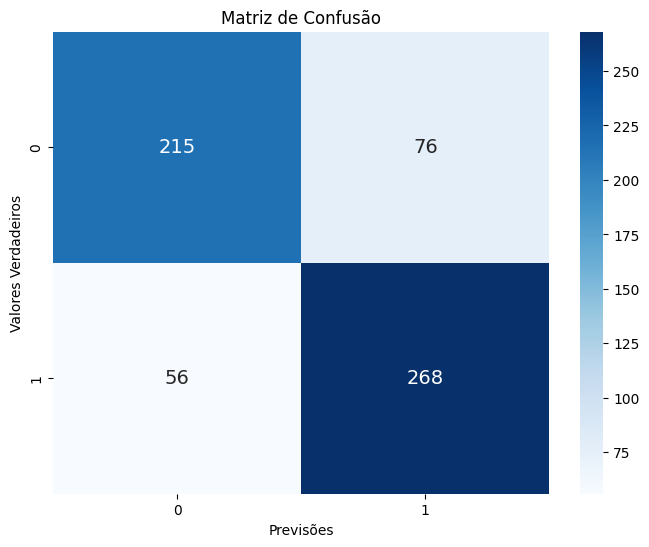

In [15]:
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

### REGRA DE BAYES

In [16]:
#Separação das classes de treinamento e testes conforme realizado nos estudos anteriores
indices = np.random.permutation(heart.shape[0])
div = int(0.4*len(indices)) #40% para treinamento e 60% para testes
desen_id , test_id = indices[:div], indices[div:]
y1 = heart['target'].to_numpy()
cj_desen, cj_test = heart.loc[desen_id,:], heart.loc[test_id,:]

xd3 = cj_desen.drop('target', axis =1).to_numpy()
yd3 = cj_desen.target.to_numpy()

xt3 = cj_test.drop('target', axis=1).to_numpy()
yt3 = cj_test.target.to_numpy()

#Regra de Bayes
classes = len(np.unique(y1))
probabilidadeC = np.zeros(classes)

for i in range(classes):
    indiceC = np.where(yd3 == i)
    probabilidadeC[i] = len(indiceC[0]) / len(yd3)

#Matriz para armazenar as probabilidades de classe
matrizProbabilidade = np.zeros((xt3.shape[0], classes))

#Calcular as probabilidades de classe
for i in range(classes):
    indiceC = np.where(yd3 == i)
    dadosDeTreino = xd3[indiceC]
    media = np.mean(dadosDeTreino, axis=0)
    covariancia = np.cov(dadosDeTreino, rowvar=False)

    for j in range(xt3.shape[0]):
        observation = xt3[j]
        matrizProbabilidade[j, i] = multivariate_normal.pdf(observation, mean=media, cov=covariancia, allow_singular=True) * probabilidadeC[i]

#Prever as classes com base nas probabilidades:
y_pred3 = np.argmax(matrizProbabilidade, axis=1)

#Calcular a acurácia das previsões:
accuracy4 = accuracy_score(yt3, y_pred3)
print(f'Acurácia: {accuracy4:.4f}')

Acurácia: 0.8439


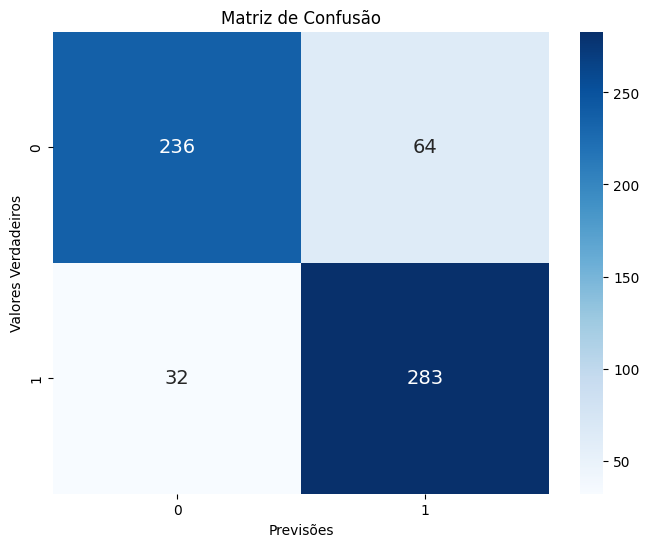

In [17]:
cm4 = confusion_matrix(yt3, y_pred3)
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()